epoch = 200
lr = 0.00001
patience = 20
batch = 64

0.95
Early stopping at epoch 67


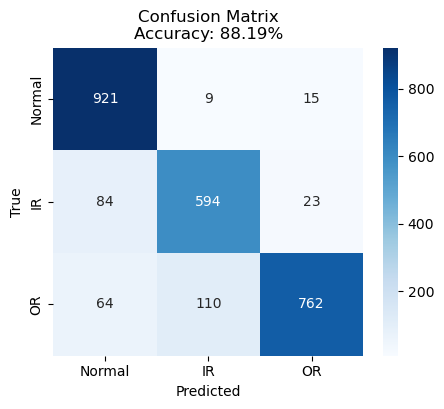

 - Model accuracy: 88.19%


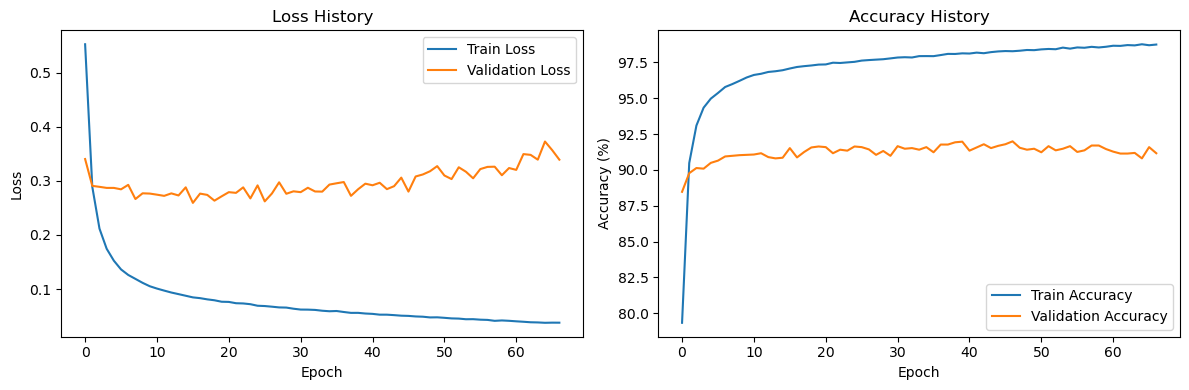

0.95
Early stopping at epoch 76


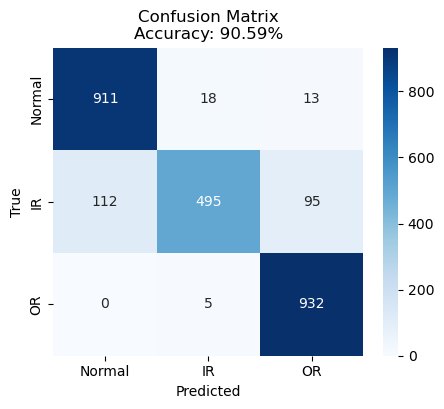

 - Model accuracy: 90.59%


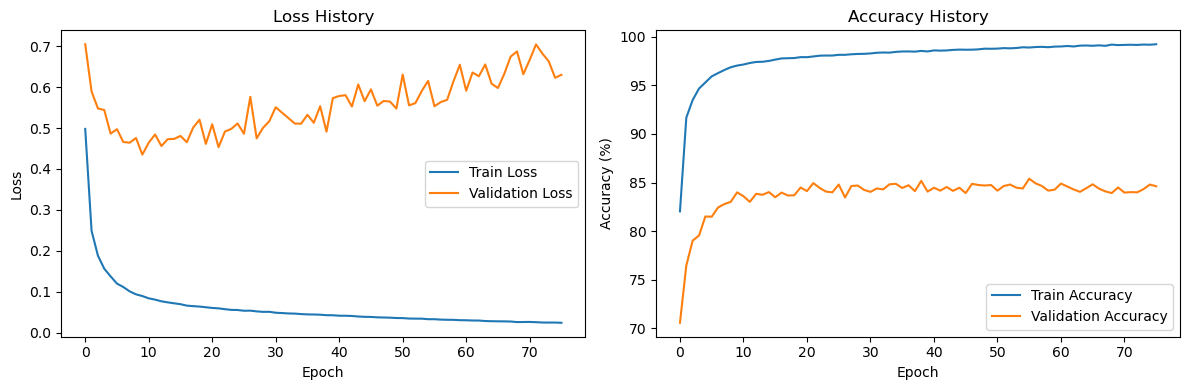

0.95
Early stopping at epoch 40


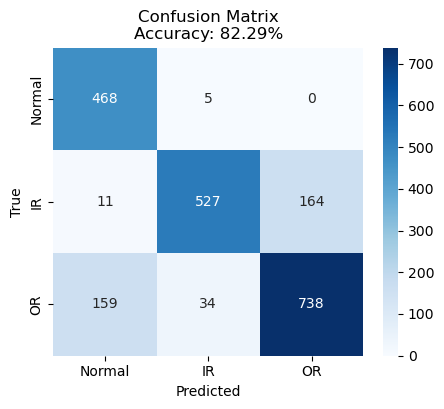

 - Model accuracy: 82.29%


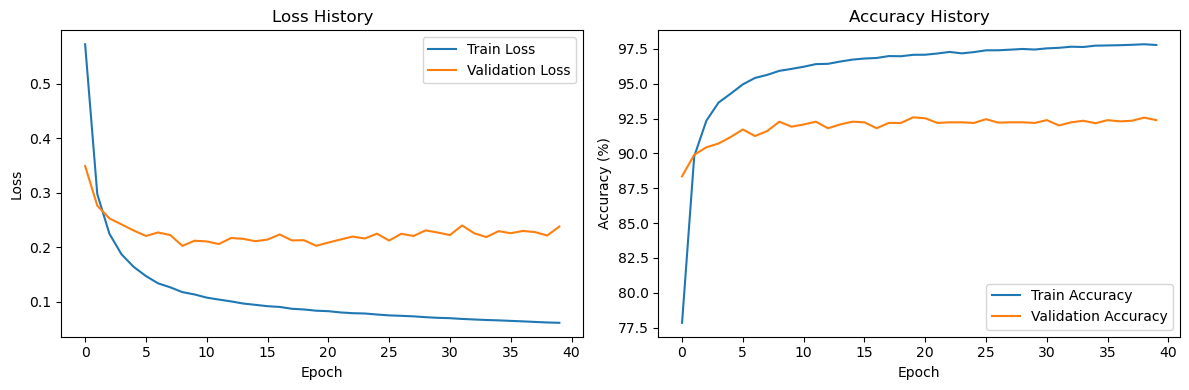

0.95
Early stopping at epoch 50


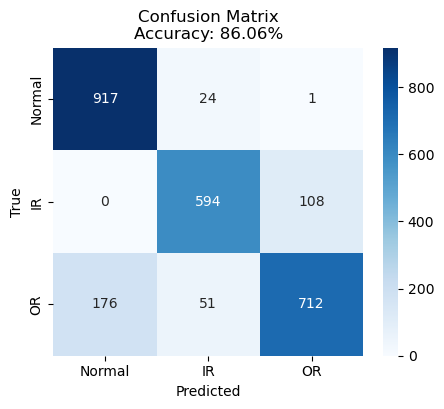

 - Model accuracy: 86.06%


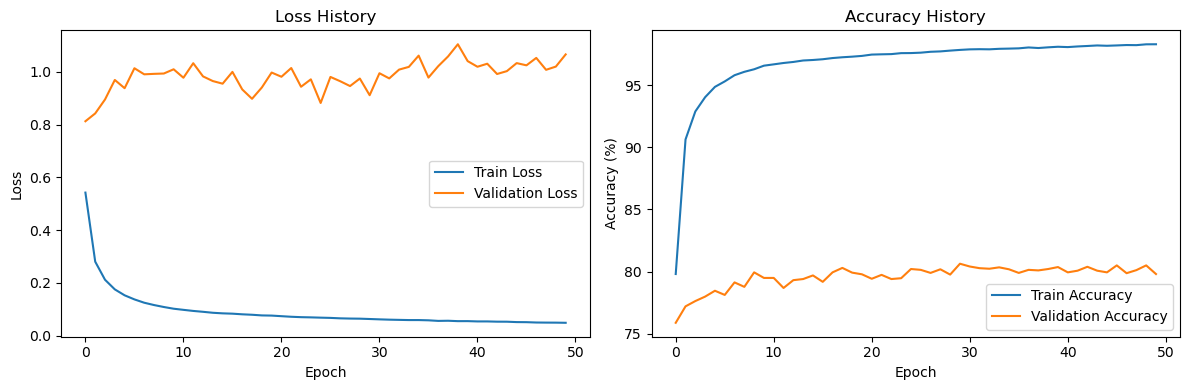

0.95
Early stopping at epoch 46


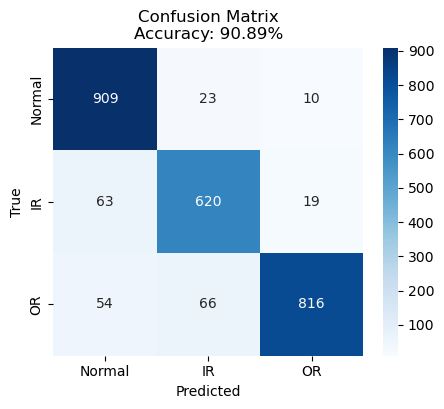

 - Model accuracy: 90.89%


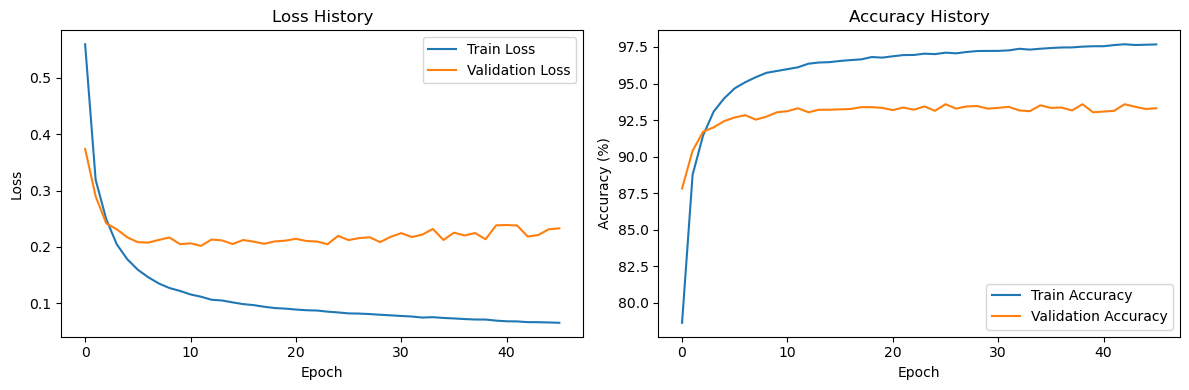

0.95
Early stopping at epoch 54


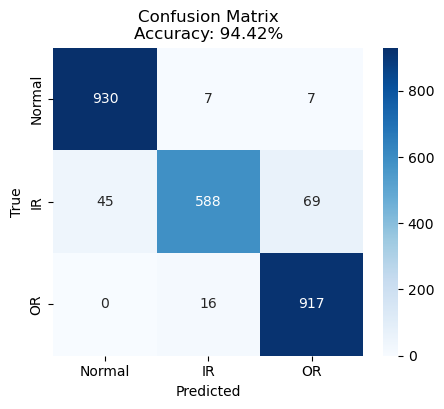

 - Model accuracy: 94.42%


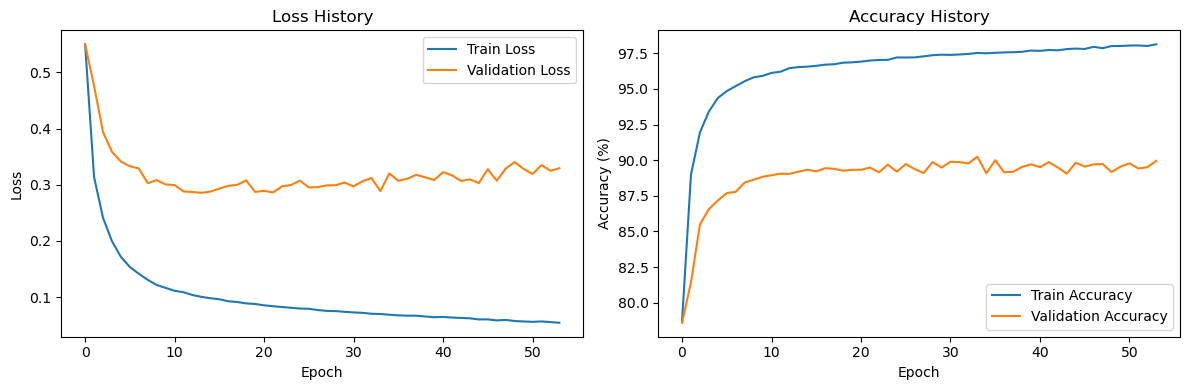

0.95
Early stopping at epoch 101


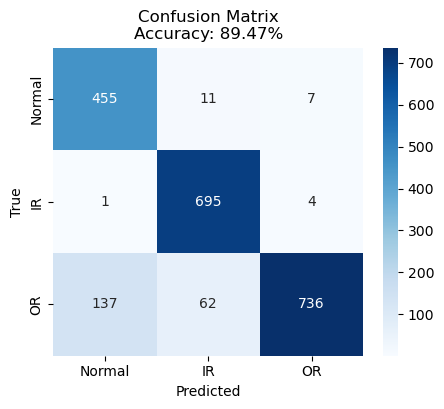

 - Model accuracy: 89.47%


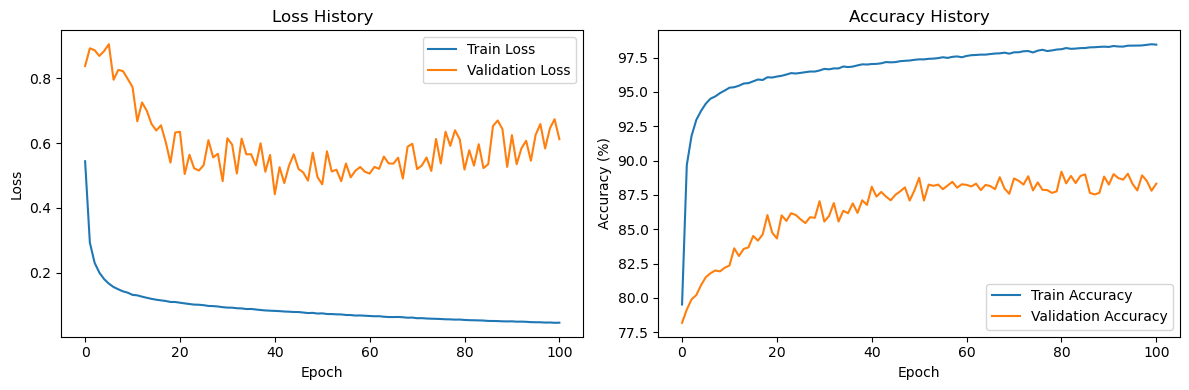

0.95
Early stopping at epoch 50


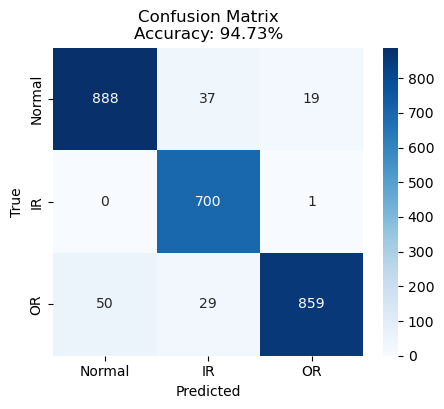

 - Model accuracy: 94.73%


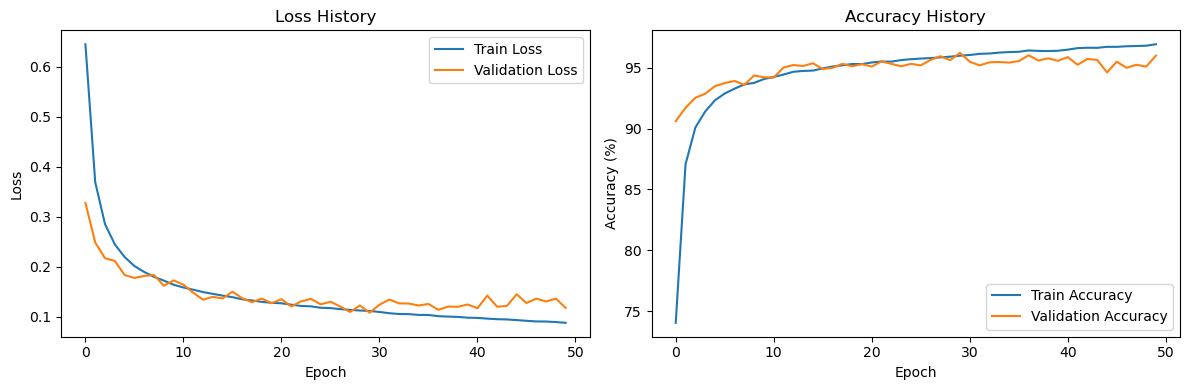

0.95
Early stopping at epoch 77


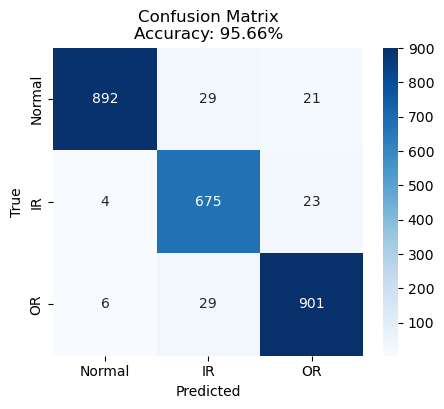

 - Model accuracy: 95.66%


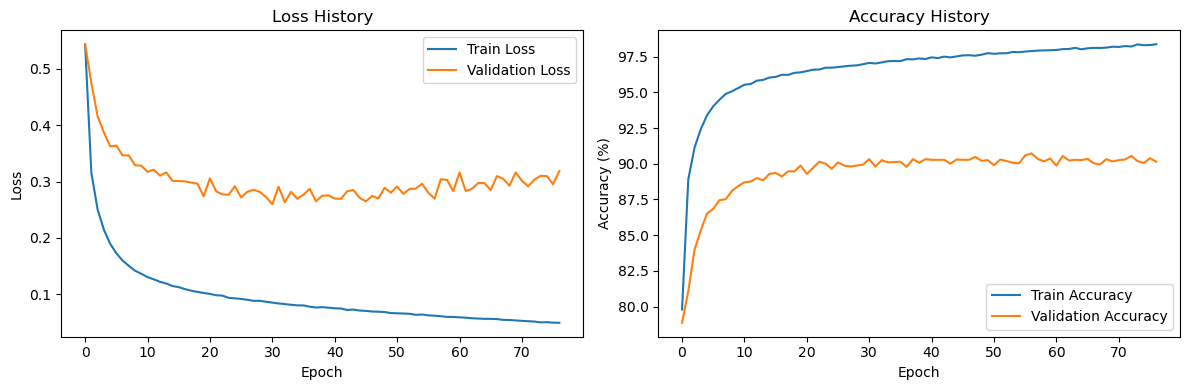

0.95
Early stopping at epoch 35


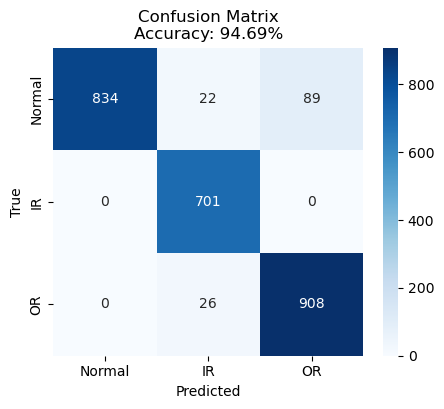

 - Model accuracy: 94.69%


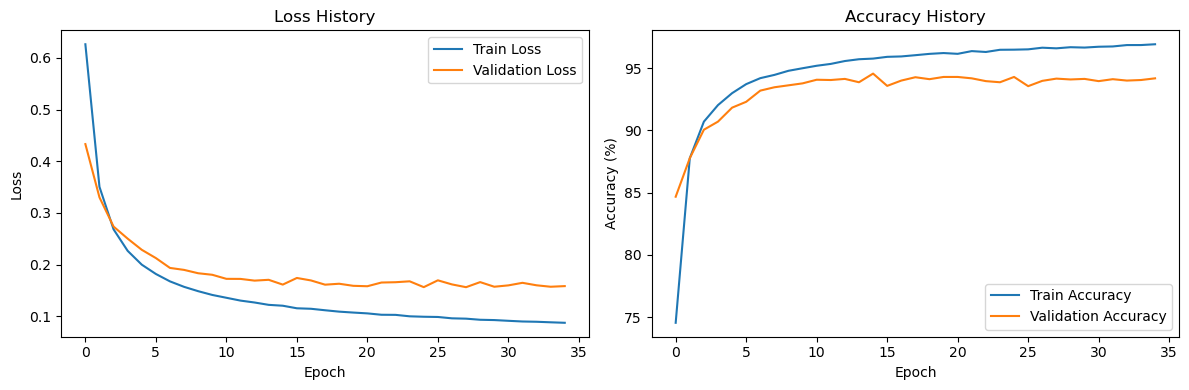

0.95
Early stopping at epoch 41


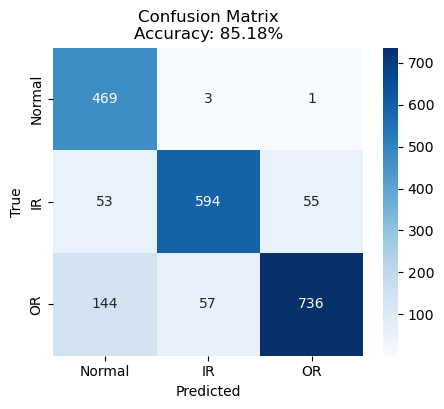

 - Model accuracy: 85.18%


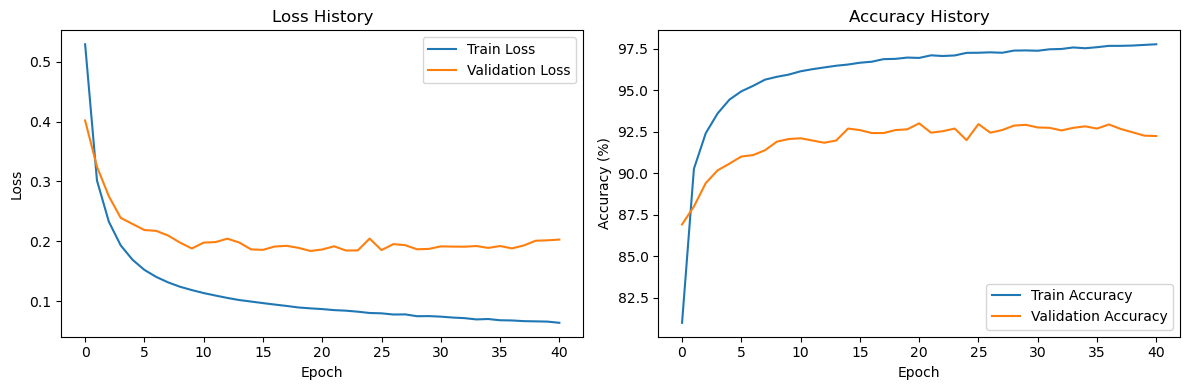

0.95
Early stopping at epoch 34


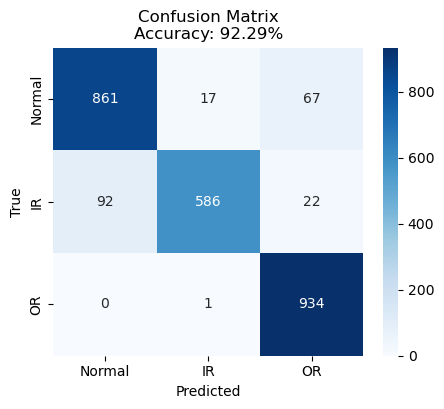

 - Model accuracy: 92.29%


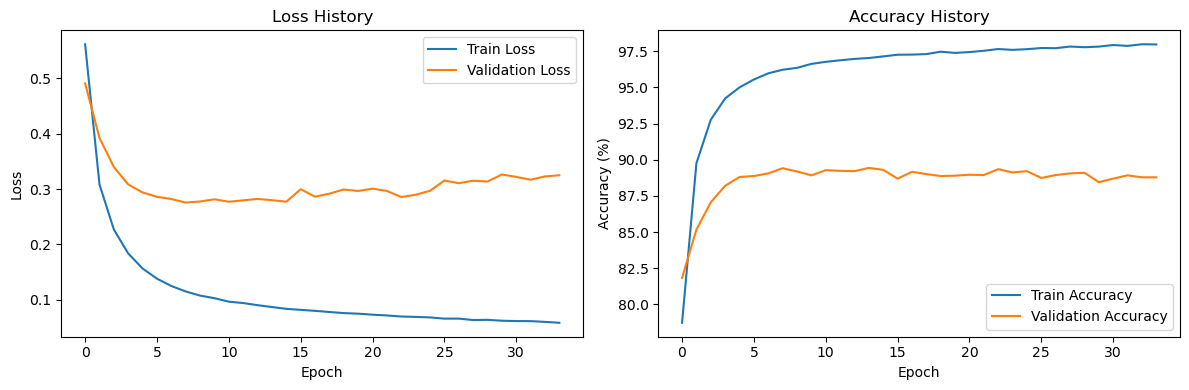

0.95
Early stopping at epoch 66


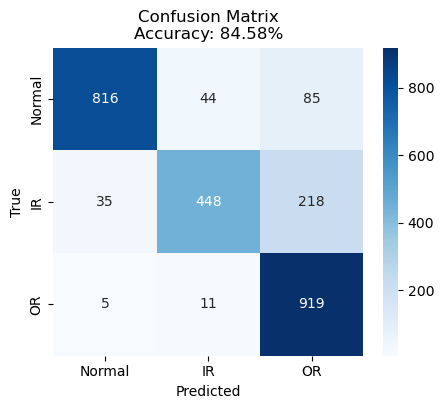

 - Model accuracy: 84.58%


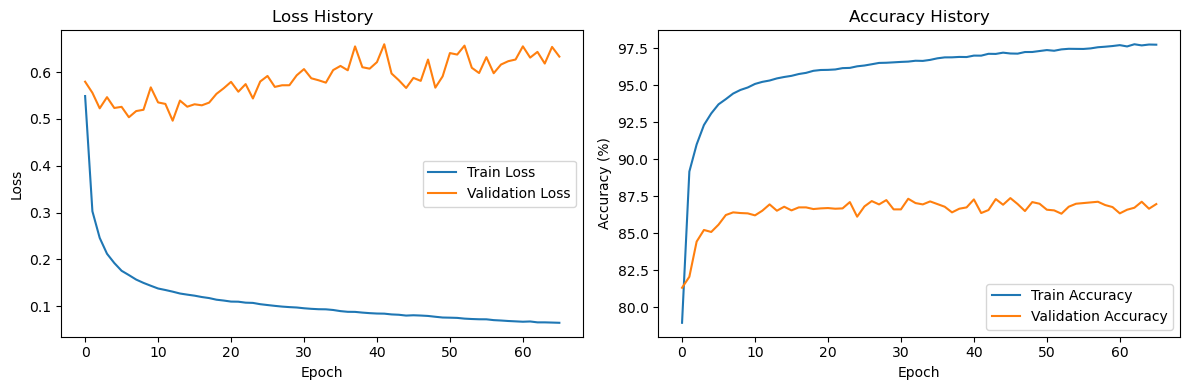

0.95
Early stopping at epoch 51


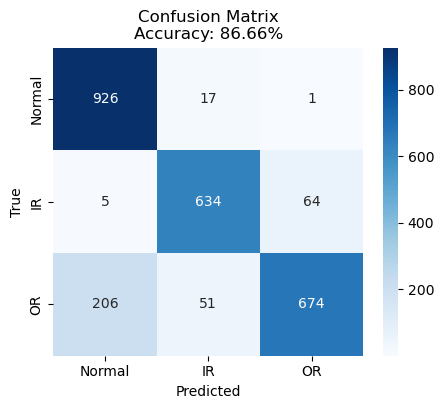

 - Model accuracy: 86.66%


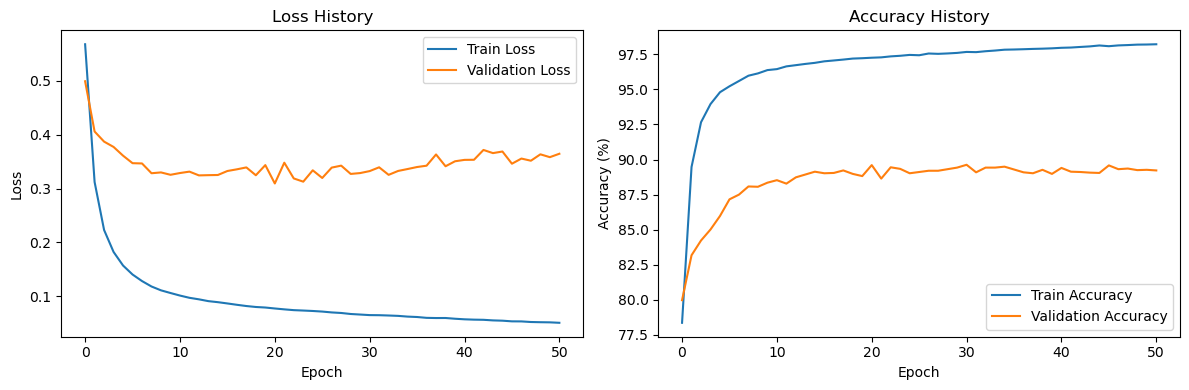

0.95
Early stopping at epoch 63


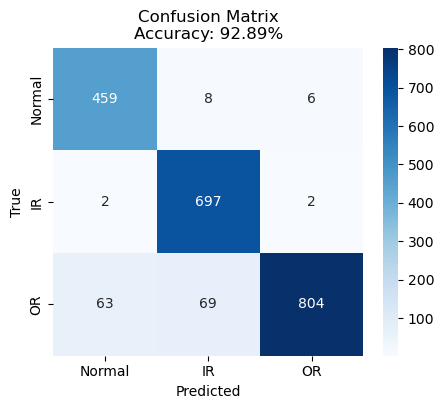

 - Model accuracy: 92.89%


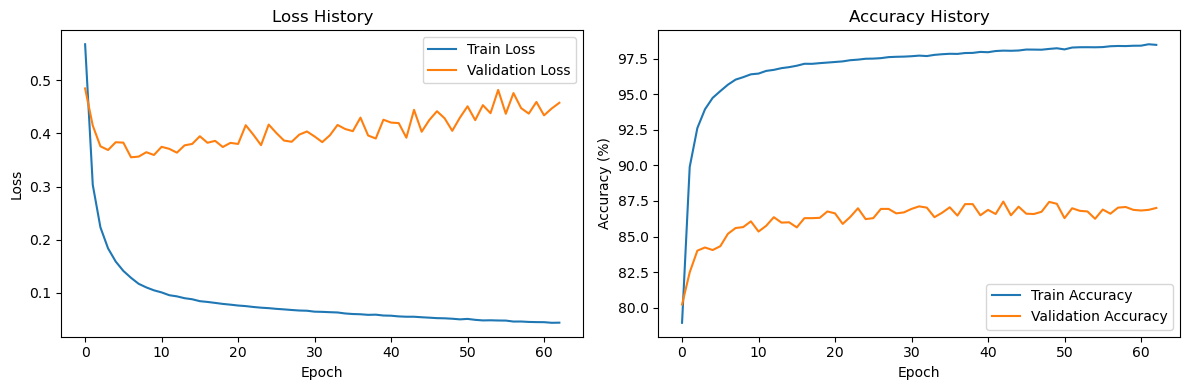

0.95
Early stopping at epoch 57


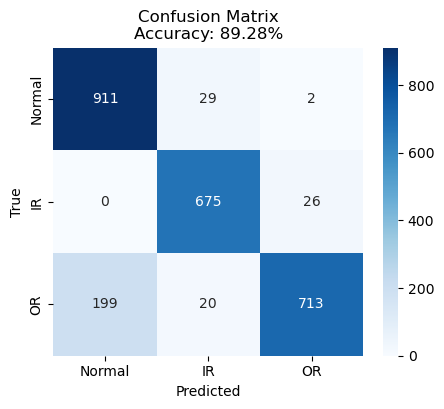

 - Model accuracy: 89.28%


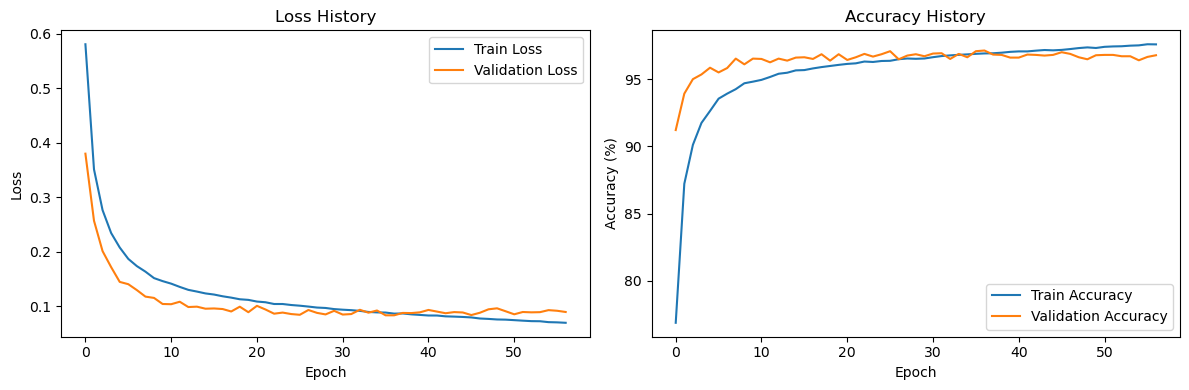

0.95
Early stopping at epoch 57


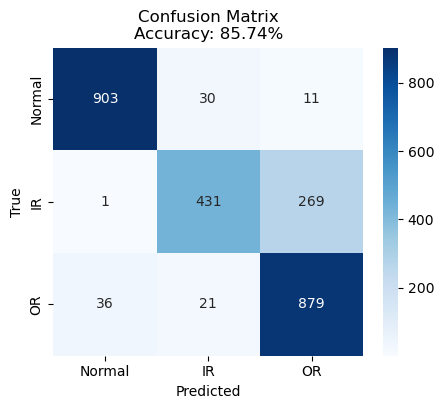

 - Model accuracy: 85.74%


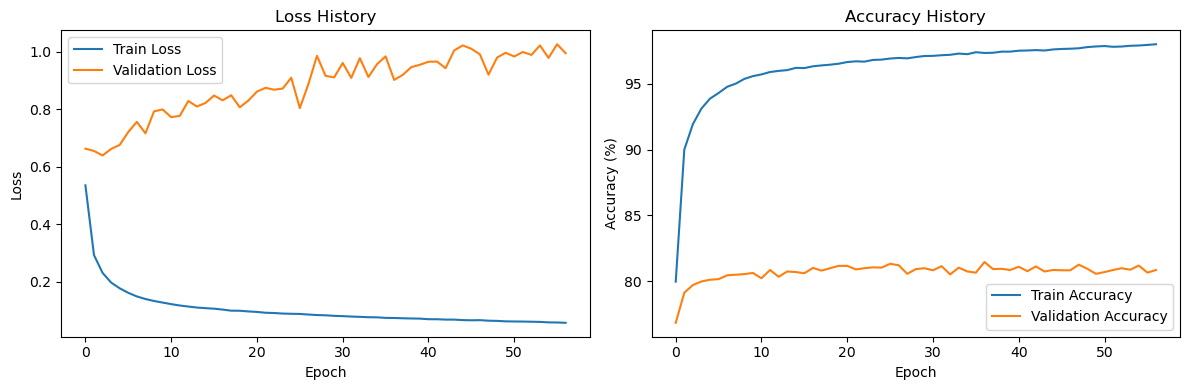

0.95
Early stopping at epoch 67


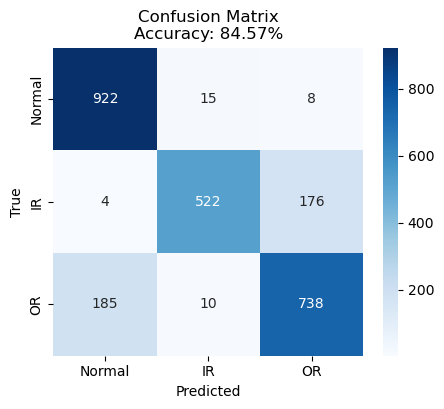

 - Model accuracy: 84.57%


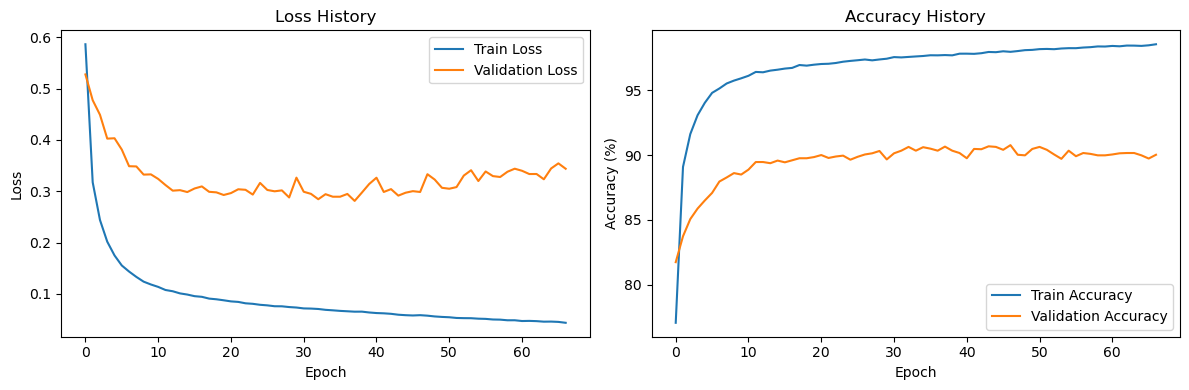

0.95
Early stopping at epoch 65


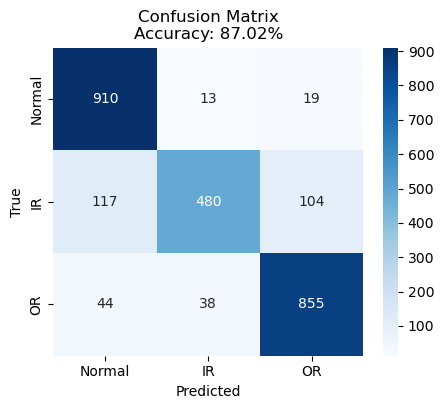

 - Model accuracy: 87.02%


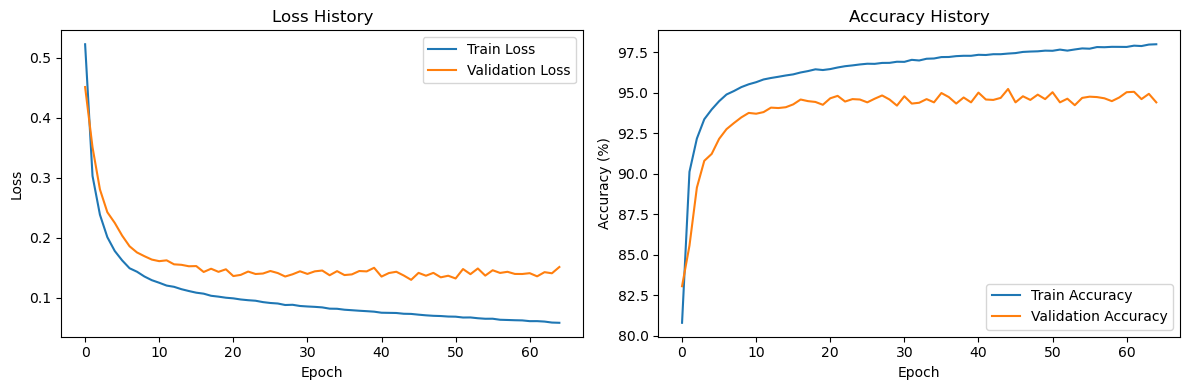

0.95
Early stopping at epoch 60


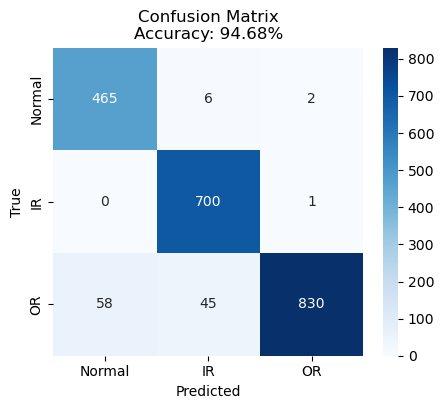

 - Model accuracy: 94.68%


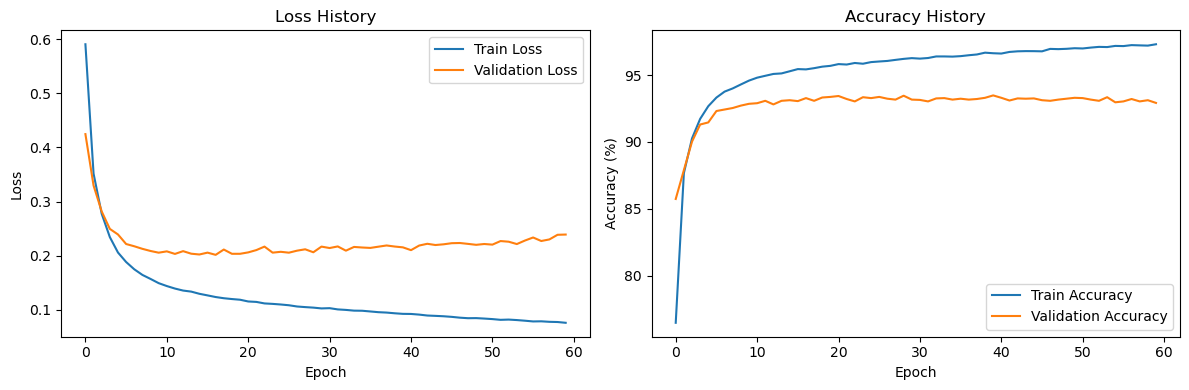

0.95
Early stopping at epoch 47


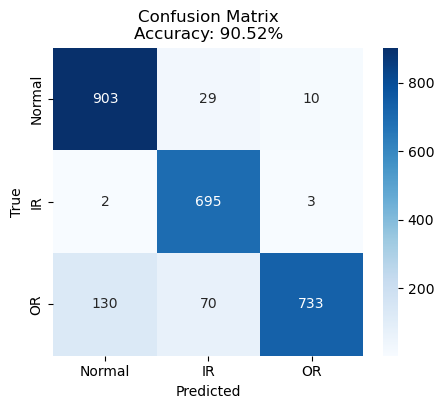

 - Model accuracy: 90.52%


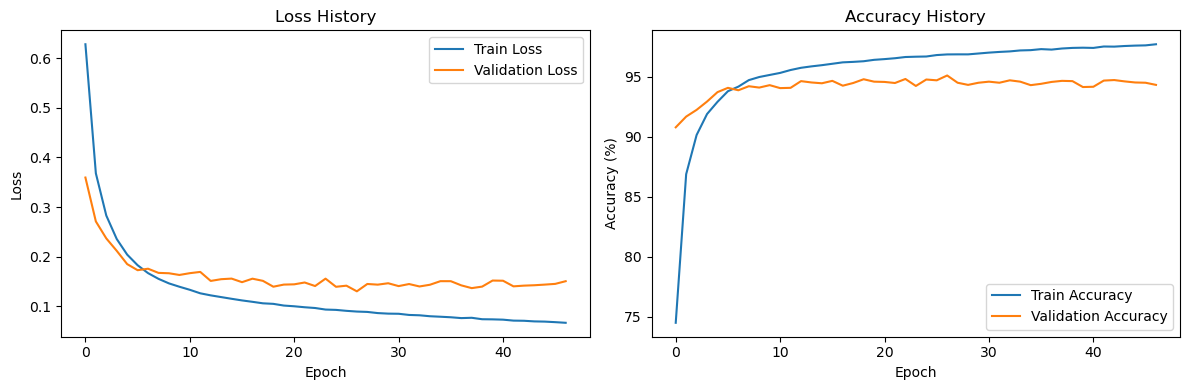

0.95
Early stopping at epoch 50


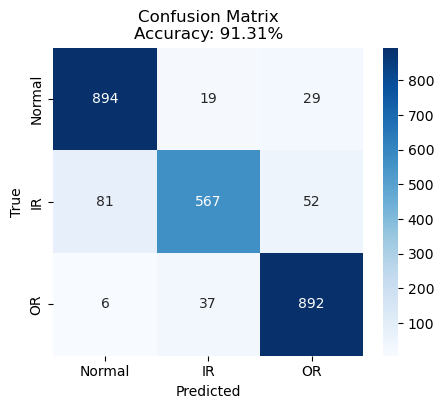

 - Model accuracy: 91.31%


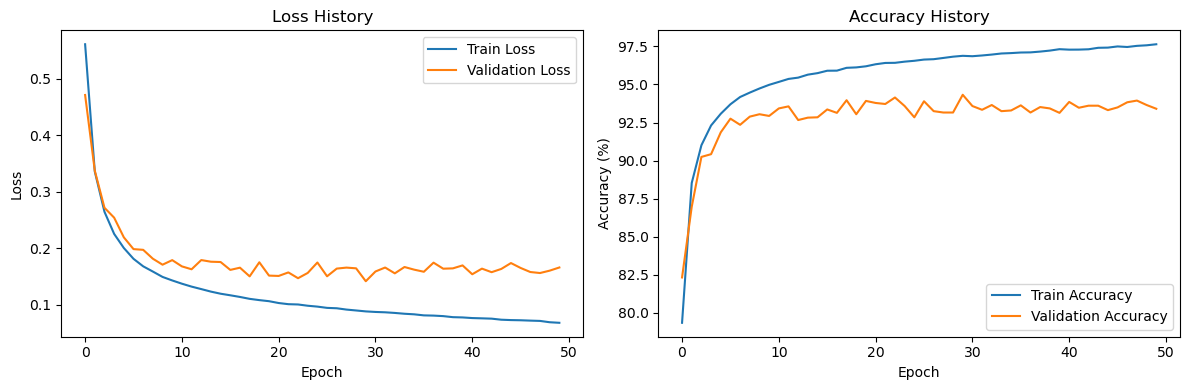

0.95
Early stopping at epoch 58


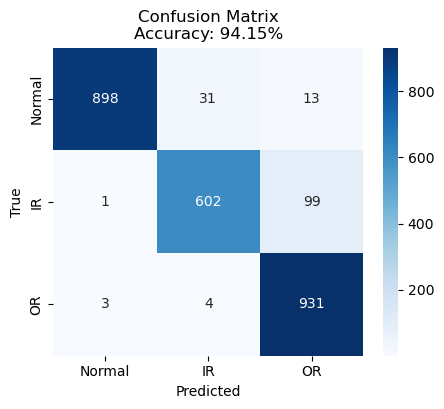

 - Model accuracy: 94.15%


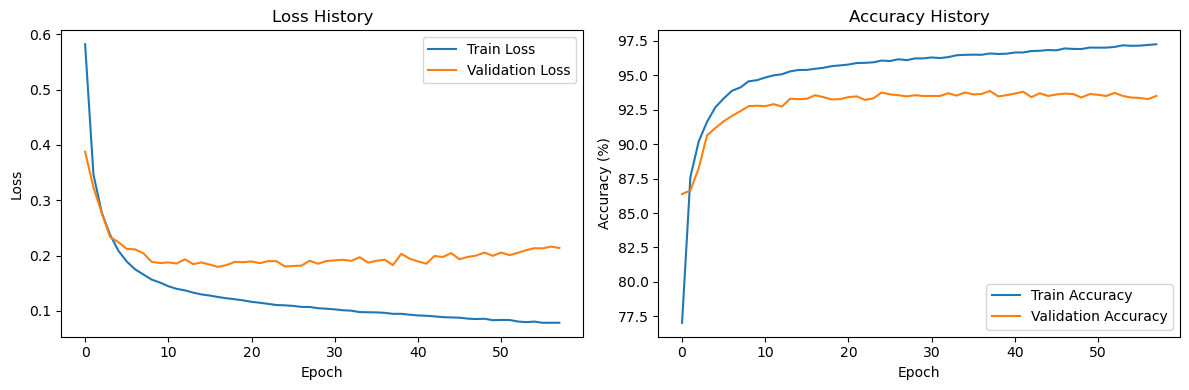

0.95
Early stopping at epoch 72


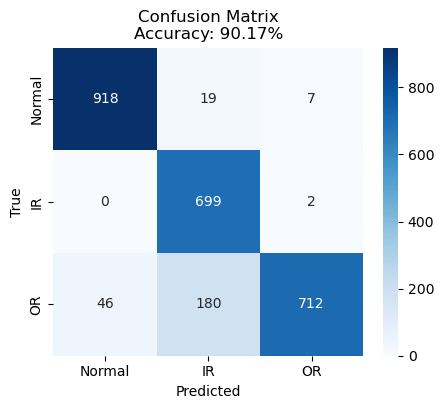

 - Model accuracy: 90.17%


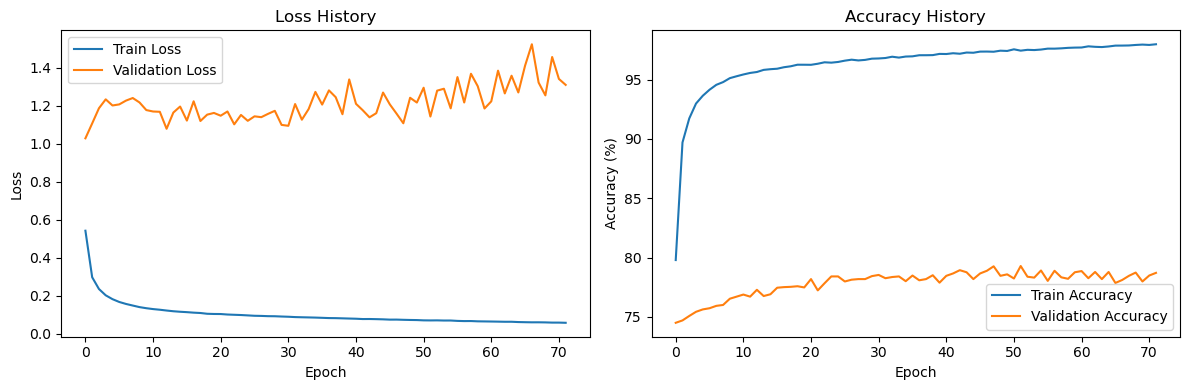

0.95
Early stopping at epoch 44


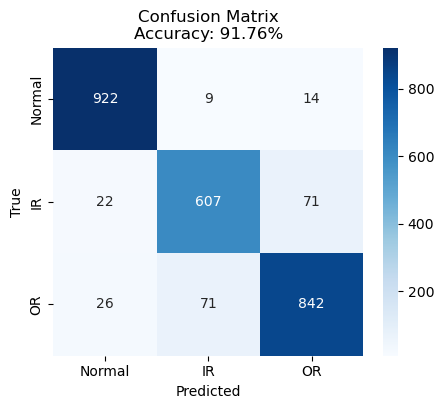

 - Model accuracy: 91.76%


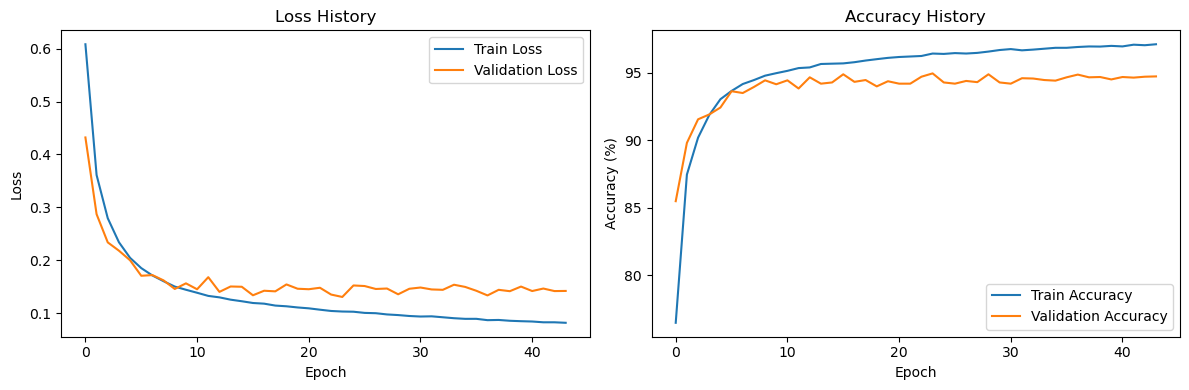

0.95
Early stopping at epoch 37


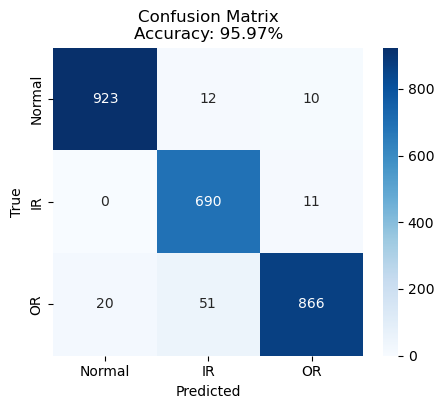

 - Model accuracy: 95.97%


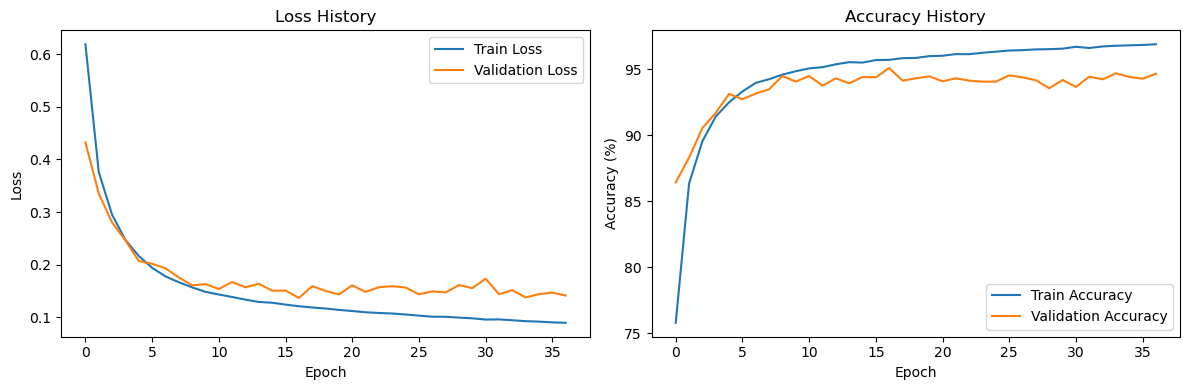

0.95
Early stopping at epoch 33


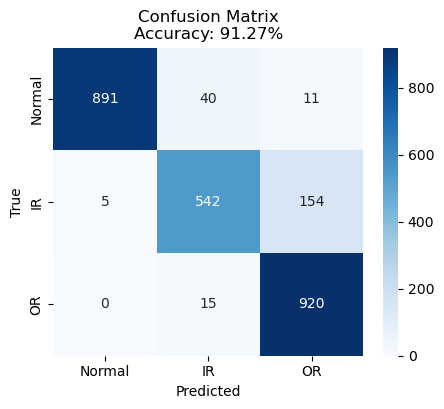

 - Model accuracy: 91.27%


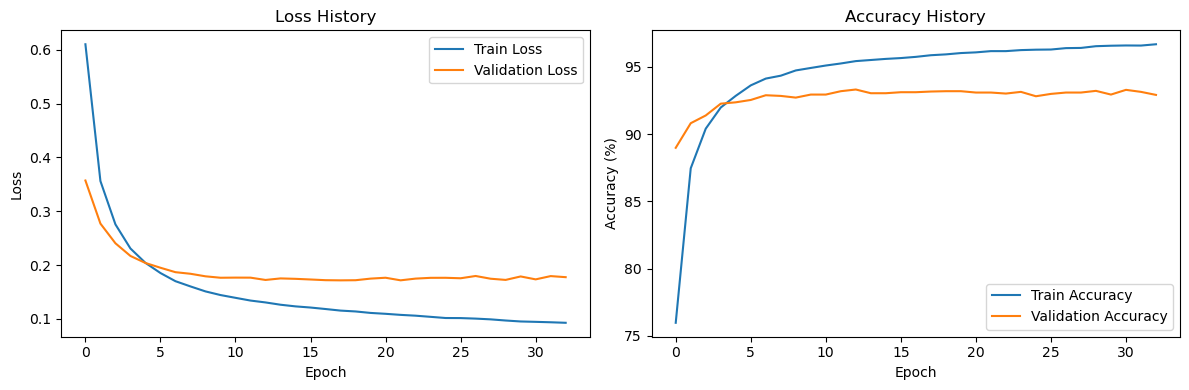

0.95
Early stopping at epoch 68


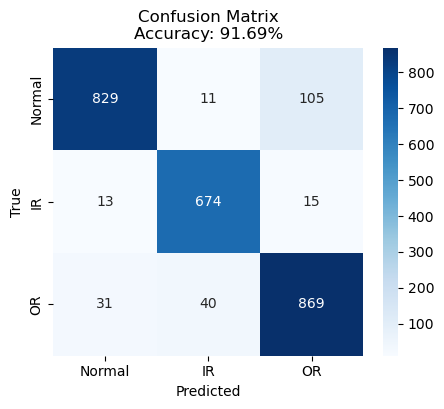

 - Model accuracy: 91.69%


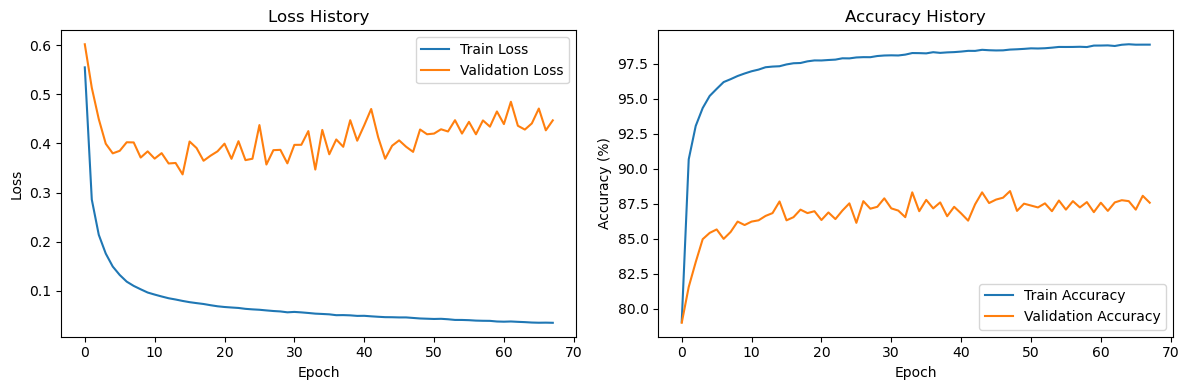

0.95
Early stopping at epoch 79


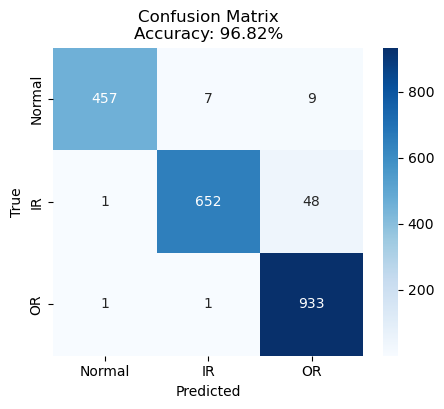

 - Model accuracy: 96.82%


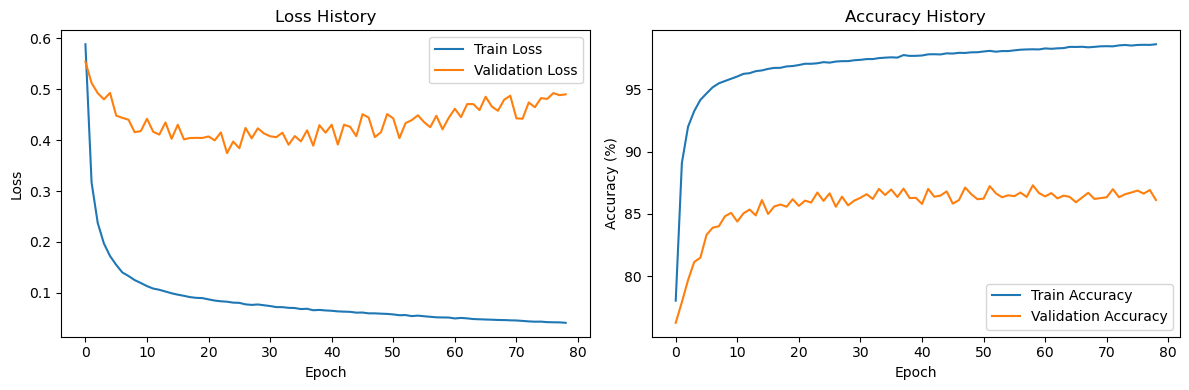

0.95
Early stopping at epoch 38


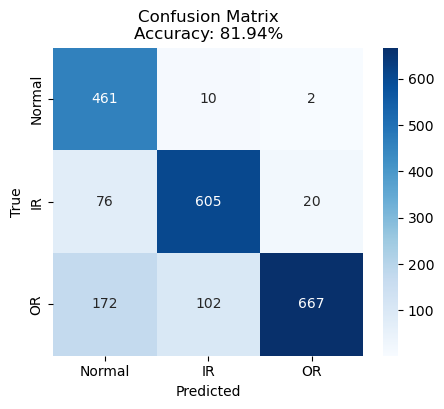

 - Model accuracy: 81.94%


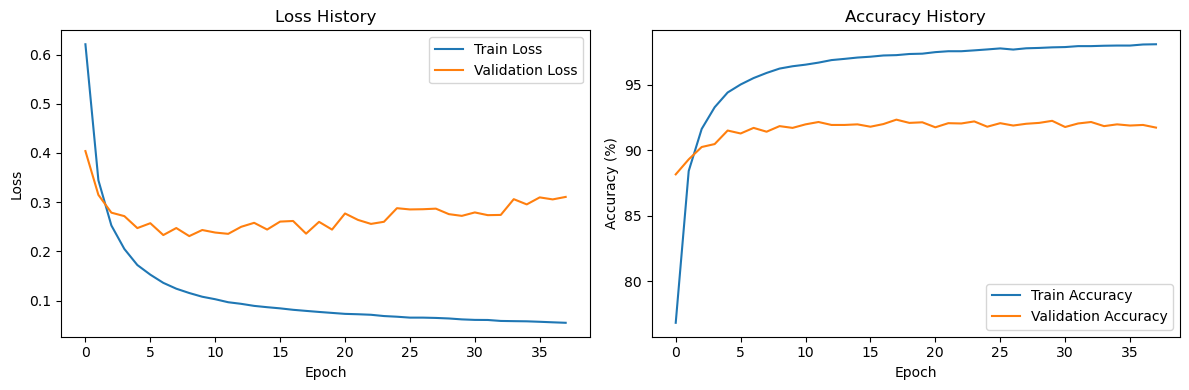

Mean accuracy: 0.9018263364642886
Std accuracy: 0.04102736306034808


In [2]:
import cfg
from src import data_loader as data_loader, models, trainer, evaluate
from torchinfo import summary
import torch.nn as nn
import torch.optim as optim
import numpy as np

accuracy_list = []

for i in range(30):
    trainer.set_seed(i)

    X_train, Y_train, X_val, Y_val, X_test, Y_test, test_files, len_processed = data_loader.data_import(cfg, 500)
    X_train = X_train *1e2
    X_val = X_val *1e2
    X_test = X_test *1e2
    train_loader, val_loader, test_loader = data_loader.create_dataloaders(X_train, Y_train, X_val, Y_val,X_test, Y_test, cfg, len_processed)

    model = models.Deeper1DCNN(1, cfg.NUM_CLASSES)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr= cfg.LEARNING_RATE) #weight_decay=1e-4
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max= cfg.NUM_EPOCHS, eta_min=cfg.LEARNING_RATE *1e-2)

    trained_model, history = trainer.train_model(model, train_loader, val_loader, criterion, optimizer, 'test.pth', scheduler, num_epochs=cfg.NUM_EPOCHS, device=cfg.DEVICE)

    accuracy = evaluate.plot_confusion_matrix(trained_model, test_loader, 'cpu', cfg.CLASS_NAMES)
    accuracy_list.append(accuracy)
    evaluate.plot_history(history)

print('='*20)
print('Mean accuracy:', np.mean(accuracy_list))
print('Std accuracy:', np.std(accuracy_list))